In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
import pandas as pd
import seaborn as sns
import math
import matplotlib.colors
import sklearn

def plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.5,fontsize=15):

    y_pred=y_score>threshold

    TP=sum((y_true==1) & (y_pred==1))
    TN=sum((y_true==0) & (y_pred==0))
    FN=sum((y_true==1) & (y_pred==0))
    FP=sum((y_true==0) & (y_pred==1))

    precision=TP/(TP+FP)
    negative_predictive_value=TN/(TN+FN)
    recall_sensitivity=TP/(TP+FN)
    specificity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    f1_score=2/((1/recall_sensitivity)+(1/precision))
    mcc=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
    auc=None #sklearn.metrics.roc_auc_score(y_true,y_score)

    plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,fontsize=fontsize,
        precision=precision,
        negative_predictive_value=negative_predictive_value,
        recall_sensitivity=recall_sensitivity,
        specificity=specificity,
        accuracy=accuracy,
        f1_score=f1_score,
        mcc=mcc,
        auc=auc)



def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,precision=None,negative_predictive_value=None,recall_sensitivity=None,specificity=None,accuracy=None,f1_score=None,mcc=None,auc=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((precision is not None) | 
        (negative_predictive_value is not None) | 
        (recall_sensitivity is not None) |
        (specificity is not None) | 
        (accuracy is not None) |
        (f1_score is not None) | 
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])



    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize) 
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)         
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80") 
    axes.xaxis.set_label_position('top') 
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80") 


    if show_metrics==True:


        if (precision is not None):
            axes.text(0, 2, f"Precision\n{precision:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (negative_predictive_value is not None):
            axes.text(1, 2, f"NPV\n{negative_predictive_value:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (recall_sensitivity is not None):
            axes.text(2, 0, f"Sensitivity\n{recall_sensitivity:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 
        if (specificity is not None):
            axes.text(2, 1, f"Specificity\n{specificity:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 

        metricas_generales=""
        if (accuracy is not None):
            metricas_generales=metricas_generales+f"Accurancy\n{accuracy:.2f}\n"
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"   
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"  
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"             

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)          



    


2023-05-09 15:24:01.950510: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-09 15:24:01.950525: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Verdaderos Positivos= 8
Verdaderos Negativos= 4
Falsos Positivos= 3
Falsos Negativos= 5


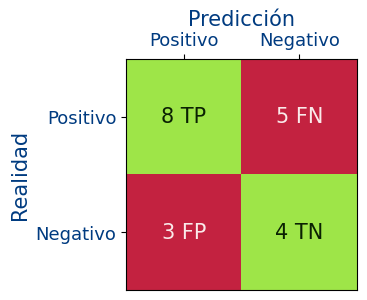

In [139]:
#Ejercicio 1
print("Verdaderos Positivos=",8)
print("Verdaderos Negativos=",4)
print("Falsos Positivos=",3)
print("Falsos Negativos=",5)


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=8,TN=4,FP=3,FN=5)




In [140]:
#Ejercicio 2.A
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

print(y_pred)

[False False  True  True False False False False  True  True  True False
 False]


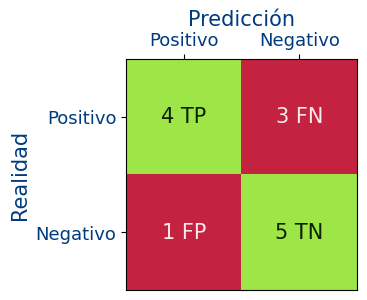

In [141]:
#Ejercicio 2.B

y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5


TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN)


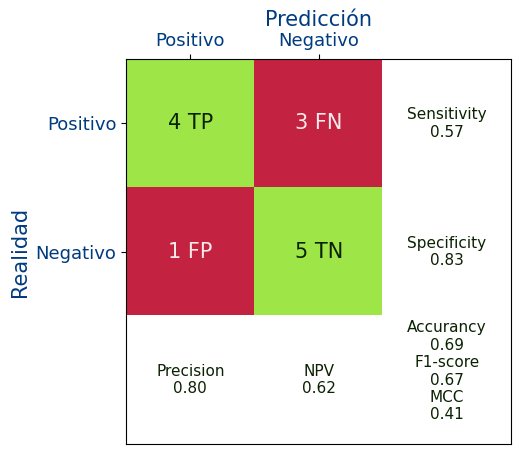

In [142]:
#Ejercicio 2.C


y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))

accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall_sensitivity=TP/(TP+FN)
negative_predictive_value=TN/(TN+FN)
specificity=TN/(TN+FP)
f1_score=2/((1/recall_sensitivity)+(1/precision))
mcc=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

figure=plt.figure(figsize=(5, 5)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,
        precision=precision,
        negative_predictive_value=negative_predictive_value,
        recall_sensitivity=recall_sensitivity,
        specificity=specificity,
        accuracy=accuracy,
        f1_score=f1_score,
        mcc=mcc)

In [3]:
#Rutinas comunes

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import tensorflow_addons as tfa

def plot_metrics(axes,history,title,metrics_names=[]):

    if (history is not None):
 
      axes.plot(history['loss'],linestyle="dotted",c="#003B80")  
      axes.plot(history['val_loss'],linestyle="solid",label=f"loss validación:{history['val_loss'][-1]:.2f}",c="#003B80")

      for metric_name in metrics_names:
        color=next(axes._get_lines.prop_cycler)['color']

        last_value_metric_validation=float(history['val_'+metric_name][-1])

        axes.plot(history[metric_name],linestyle="dotted",c=color)  
        axes.plot(history['val_'+metric_name],linestyle="solid",label=f"{metric_name}:{last_value_metric_validation:.2f}",c=color)

      axes.set_xlabel('Nº Épocas', fontsize=13,color="#003B80")
      axes.xaxis.set_major_locator(MaxNLocator(integer=True))

      axes.set_ylabel('Métricas', fontsize=13,color="#003B80")
      axes.set_ylim(ymin=0,ymax=1.1)
      axes.yaxis.set_major_locator(MultipleLocator(0.1))

      axes.set_title(title)
      axes.set_facecolor("#F0F7FF")
      axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=2)
      axes.legend()
    else:
      axes.set_title(title)
      axes.get_xaxis().set_visible(False)
      axes.get_yaxis().set_visible(False)

def compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test,metrics=[]):

    input_dim=x_train.shape[1]

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
   
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss,optimizer=optimizer,metrics=metrics)
   
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False)

    return history,model

def get_datos():
  datos=load_breast_cancer()
  x=datos.data
  y=datos.target

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test    

/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


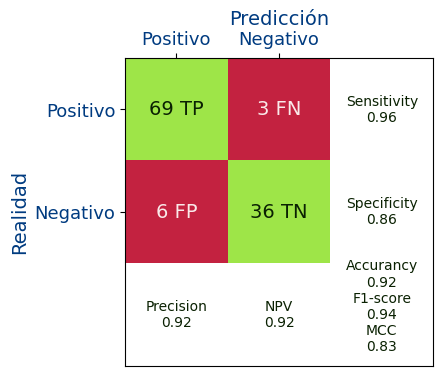

In [28]:
#Ejercicio 3.A

x_train, x_test, y_train, y_test=get_datos()

capas=[30,64,32,16,8,1]
activation="ELU"
epochs=20
learning_rate=0.0001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)

history,model=compile_fit(capas,activation,"sigmoid","binary_crossentropy",optimizer,epochs,x_train, x_test, y_train, y_test)

y_score=model.predict(x_test).reshape(-1)
y_true=y_test

figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.5,fontsize=14)


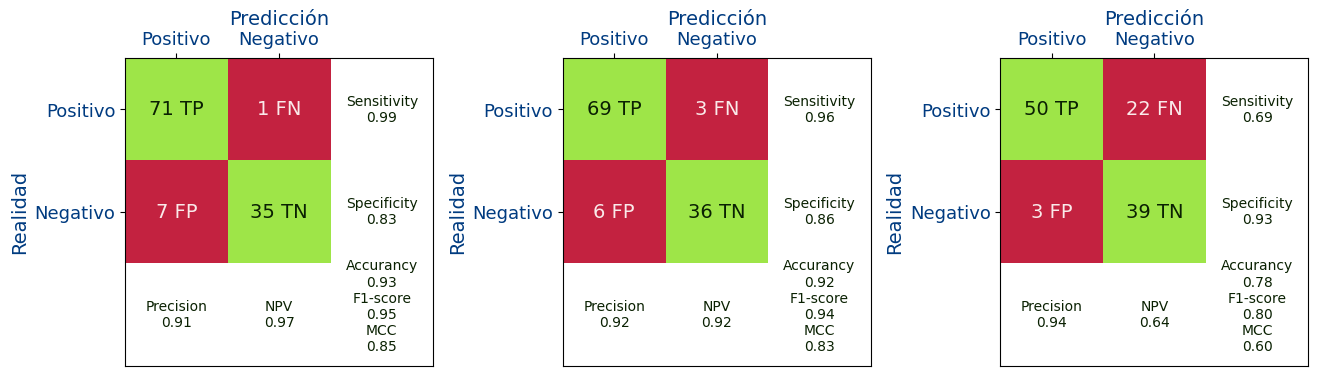

In [29]:
#Ejercicio 3.B

figure=plt.figure(figsize=(16,4)) 
axes=figure.add_subplot(1,3,1)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.4,fontsize=14)
axes=figure.add_subplot(1,3,2)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.5,fontsize=14)
axes=figure.add_subplot(1,3,3)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.85,fontsize=14)


print("El mejor umbral para esta red sería 0.4 ya que hay menos falsos negativos, es decir que tiene una mejor sensitividad")

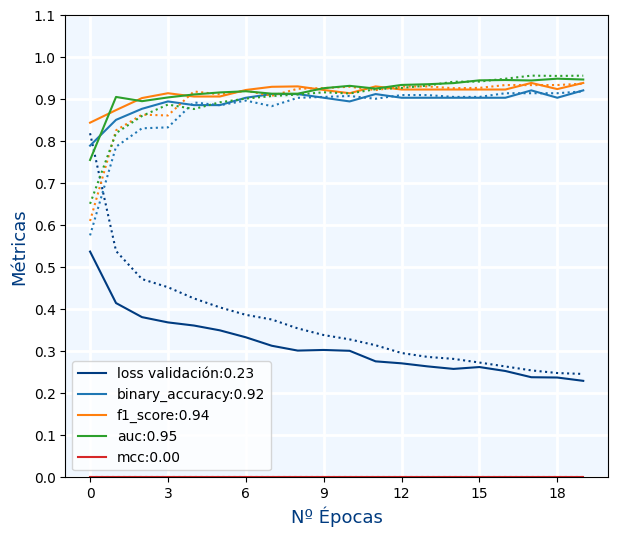

In [37]:
#Ejercicio 3.C

x_train, x_test, y_train, y_test=get_datos()

capas=[30,64,32,16,8,1]
activation="ELU"
epochs=20
learning_rate=0.0001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics=['binary_accuracy',tfa.metrics.F1Score(num_classes=1, threshold=0.5),"AUC",tfa.metrics.MatthewsCorrelationCoefficient(num_classes=2,name="mcc")]
metrics_names=['binary_accuracy','f1_score',"auc","mcc"]


history,model=compile_fit(capas,activation,"sigmoid","binary_crossentropy",optimizer,epochs,x_train, x_test, y_train, y_test,metrics)


figure=plt.figure(figsize=(7, 6)) 
axes=figure.add_subplot(1,1,1)
plot_metrics(axes,history.history,"",metrics_names=metrics_names)